In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

temperatures = [] # Array for the temperatures
function_values = []
iterations = []
states = []

# Define the two-variable function
def f(x, y):
    return (x-3)**2 + (y+2)**2 + 5  # Example function, you can replace it with any non-linear function

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)
    new_x = random.uniform(-3, 4)
    new_y = random.uniform(-3, 4)

    for i in range(1, 501):
        delta_E = f(new_x, new_y) - f(current_x, current_y)

        if delta_E <= 0:
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        elif math.exp(-delta_E / temp) > random.uniform(0, 1):
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        else:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)


        states.append((current_x, current_y))
        function_values.append(f(current_x, current_y))
        temperatures.append(temp)
        iterations.append(i)
        #i = i+1
        temp = temp * 0.8

    return best_solution, best_value

best_solution, best_value = simulate(1500)
print("Optimal solution:", best_solution)
print("Function value at optimal solution:", best_value)


Optimal solution: (2.953751284929681, -1.85736816978967)
Function value at optimal solution: 5.022482782634804


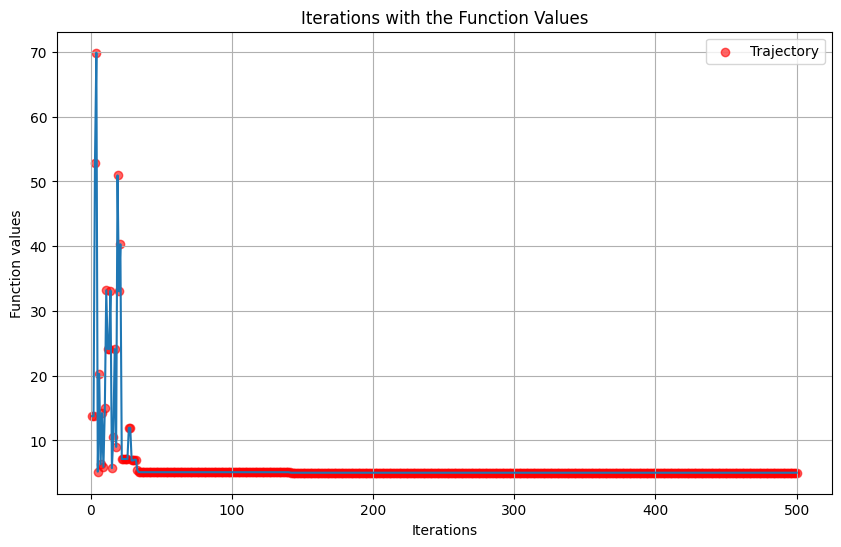

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,function_values)
plt.scatter(iterations,function_values, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('Function values')
plt.title('Iterations with the Function Values')
plt.legend()
plt.grid(True)
plt.show()

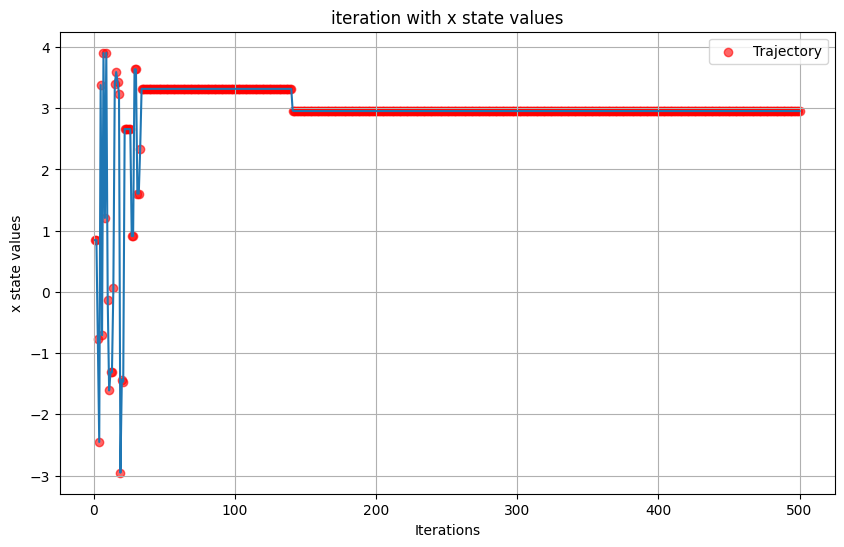

In [3]:

x = [s[0] for s in states]
y = [s[1] for s in states]
z = [f(s[0], s[1]) for s in states]
plt.figure(figsize=(10, 6))
plt.plot(iterations,x)
plt.scatter(iterations,x, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('x state values')
plt.title('iteration with x state values')
plt.legend()
plt.grid(True)
plt.show()

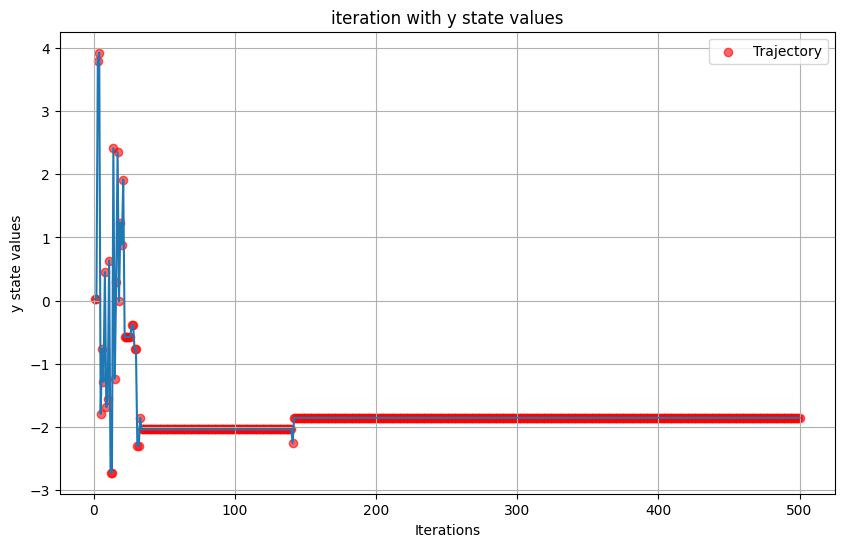

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,y)
plt.scatter(iterations,y, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('y state values')
plt.title('iteration with y state values')
plt.legend()
plt.grid(True)
plt.show()

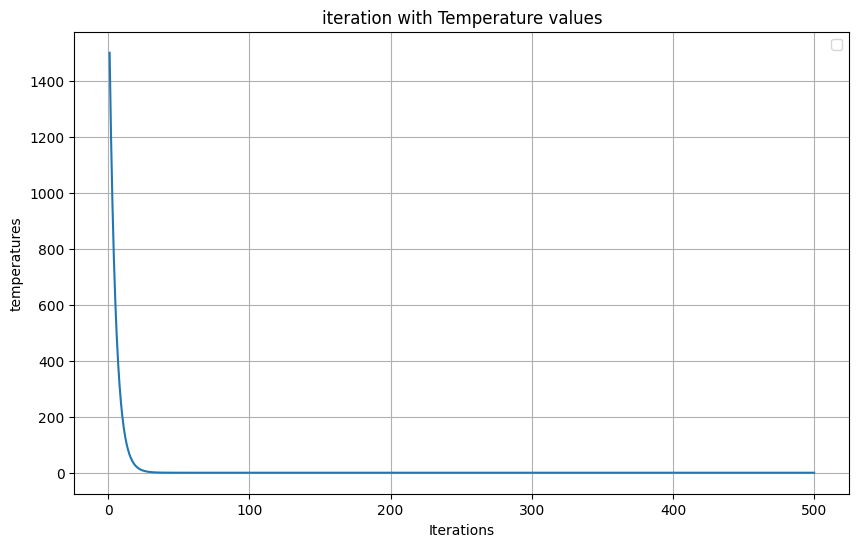

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,temperatures)
# plt.scatter(iterations,y, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('temperatures')
plt.title('iteration with Temperature values')
plt.legend()
plt.grid(True)
plt.show()